In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ARTHROSCOPIC AC RECONSTRUCTION - Patiënten.csv',skiprows = lambda x: not x in list(range(20,20+46)))

In [3]:
df = df.rename({'Unnamed: 0':'Patient_ID'},axis=1)

df = df.rename({'Satisfaction (/10)':'Satisfaction'},axis=1)
df = df.rename({'DASH (/100)':'DASH'},axis=1)
df = df.rename({'SPADI (/130)':'SPADI'},axis=1)

In [4]:
FEATURES = ['Satisfaction','Constant','DASH','SPADI']

In [5]:
df.columns

Index(['Patient_ID', 'Surgeon', 'Rockwood's degree',
       'Techniques used other than Tightrope',
       'Associated cuff/labrum/cartilage damage', 'AC luxation: Left/right',
       'Left/right-handed', 'Age at time of surgery (y)',
       'Time until surgery (d)', 'Time since surgery (m)',
       'Return to sports (%)', 'Satisfaction', 'DASH', 'SPADI', 'Constant',
       'Verschil CS', 'Failure (RX)', 'ACJ widening', 'Other RX',
       'Complications', 'Revision surgery', 'Informed consent', 'Extra'],
      dtype='object')

In [6]:
df.head()

,Patient_ID,Surgeon,Rockwood's degree,Techniques used other than Tightrope,Associated cuff/labrum/cartilage damage,AC luxation: Left/right,Left/right-handed,Age at time of surgery (y),Time until surgery (d),Time since surgery (m),...,SPADI,Constant,Verschil CS,Failure (RX),ACJ widening,Other RX,Complications,Revision surgery,Informed consent,Extra
0,1,AVR,III,Mersilene,SSP hechting (Healix),R,R,48,31,57,...,22.0,75.0,11.0,50,0,/,Wondproblematiek,/,Yes,NaN
1,2,AVR,III,/,/,L,R,44,5,28,...,11.0,86.0,0.0,0,0,/,/,/,NaN,NaN
2,3,AVR,III,/,/,L,R,55,7,20,...,NaN,86.0,0.0,50,0,/,/,/,NaN,NaN
3,4,AVR,II,/,/,R,R,16,150,100,...,NaN,82.0,4.0,0,0,Button migration,/,/,NaN,NaN
4,5,AVR,III,Mersilene,"Tenotomy biceps, debridement SLAP, debridement...",R,R,42,1225,41,...,3.0,92.0,0.0,0,1,/,/,/,Yes,NaN


In [7]:
df['factor1'] = 'ACUTE'
df.loc[df.Patient_ID.isin([4,5,10,12,15,26,28,33,35,46]),'factor1'] = 'CHRONIC'

In [8]:
df['factor2'] = 'NO FAILURE'
df.loc[df.Patient_ID.isin([1,3,13,26,29,42,43,47]),'factor2'] = 'PARTIAL FAILURE'
df.loc[df.Patient_ID.isin([8,12,19,41,48]),'factor2'] = 'COMPLETE FAILURE'

In [9]:
df.sample(10)

,Patient_ID,Surgeon,Rockwood's degree,Techniques used other than Tightrope,Associated cuff/labrum/cartilage damage,AC luxation: Left/right,Left/right-handed,Age at time of surgery (y),Time until surgery (d),Time since surgery (m),...,Verschil CS,Failure (RX),ACJ widening,Other RX,Complications,Revision surgery,Informed consent,Extra,factor1,factor2
30,36,AVR,III,/,/,L,L,55,1,69,...,2.0,0,0,Calcification,NaN,/,Yes,NaN,ACUTE,NO FAILURE
9,10,AVR,III,Mersilene,/,L,R,53,210,18,...,24.0,0,0,/,NaN,/,Yes,"Trapezius R/warmte, voltaren",CHRONIC,NO FAILURE
22,27,AVR,?,Mersilene,/,L,R,26,18,95,...,0.0,0,0,/,NaN,/,Yes,NaN,ACUTE,NO FAILURE
15,18,PR,V,Mersilene,/,R,R,29,6,62,...,2.0,0,0,Calcification CC-lig,NaN,/,Yes,NaN,ACUTE,NO FAILURE
11,13,PR,III,/,Hechting CC lig,R,R,46,13,20,...,2.0,50,0,/,NaN,/,Yes,NaN,ACUTE,PARTIAL FAILURE
28,34,PR,III,Mersilene,Debridement scheur SSP,R,R,34,3,21,...,2.0,0,0,Calcification,NaN,/,Yes,NaN,ACUTE,NO FAILURE
34,40,AVR,III,/,/,R,R,37,6,65,...,2.0,0,1,/,NaN,/,NaN,NaN,ACUTE,NO FAILURE
20,25,PR,III,/,Subscap hechting (1x Super-revo),L,R,51,4,30,...,6.0,0,0,/,NaN,/,Yes,NaN,ACUTE,NO FAILURE
29,35,AVR,II,/,"Tenotomie biceps, acromioplastie, resectie lat...",R,R,42,150,84,...,2.0,0,1,/,NaN,/,Yes,NaN,CHRONIC,NO FAILURE
7,8,AVR,III,Mersilene,/,R,R,23,3,52,...,0.0,100,0,/,Irritation on plate,Hookplate (1w) + VOS,Yes,NaN,ACUTE,COMPLETE FAILURE


factor1 Satisfaction
AxesSubplot(0.1,0.15;0.8x0.75)
factor1 Constant
AxesSubplot(0.1,0.15;0.8x0.75)
factor1 DASH
AxesSubplot(0.1,0.15;0.8x0.75)
factor1 SPADI
AxesSubplot(0.1,0.15;0.8x0.75)
factor2 Satisfaction
AxesSubplot(0.1,0.15;0.8x0.75)
factor2 Constant
AxesSubplot(0.1,0.15;0.8x0.75)
factor2 DASH
AxesSubplot(0.1,0.15;0.8x0.75)
factor2 SPADI
AxesSubplot(0.1,0.15;0.8x0.75)


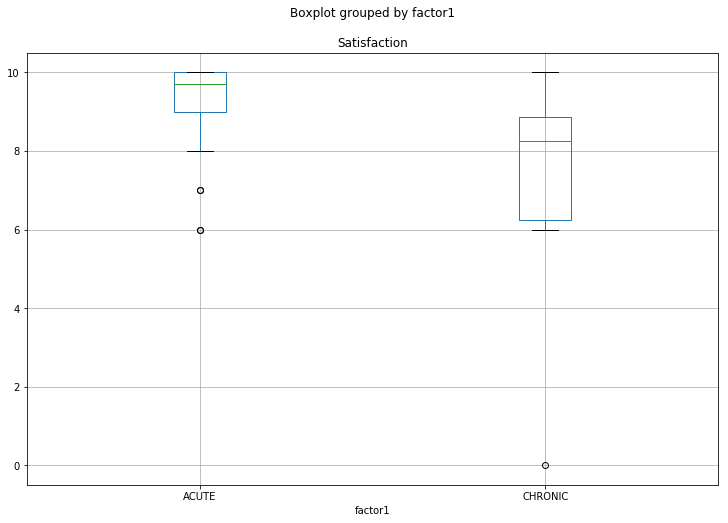

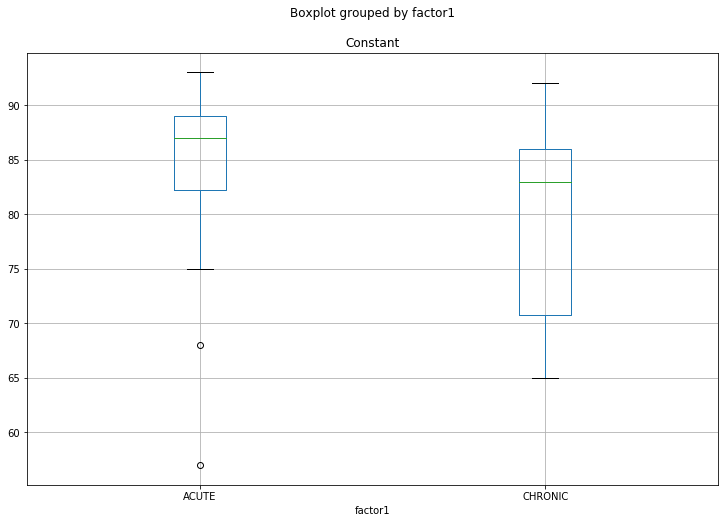

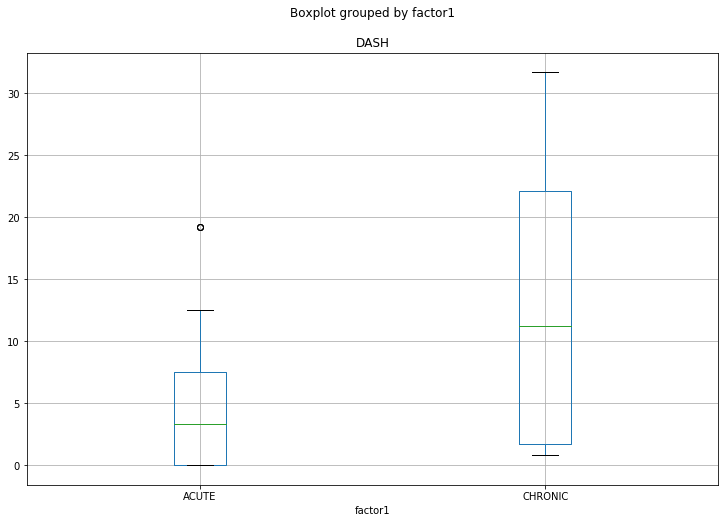

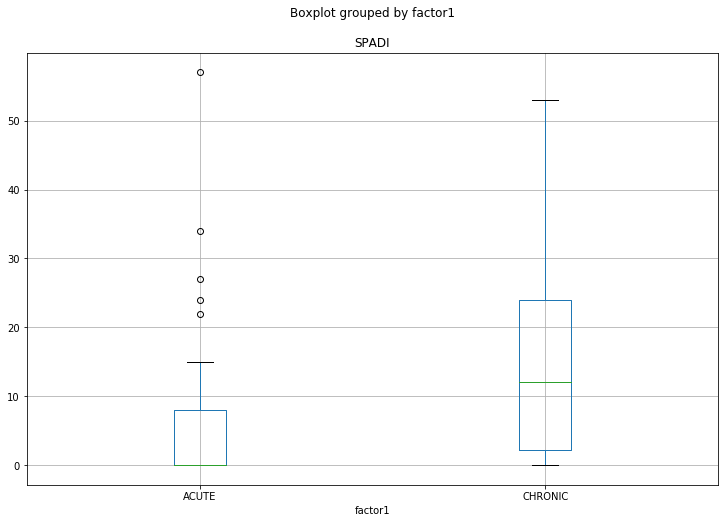

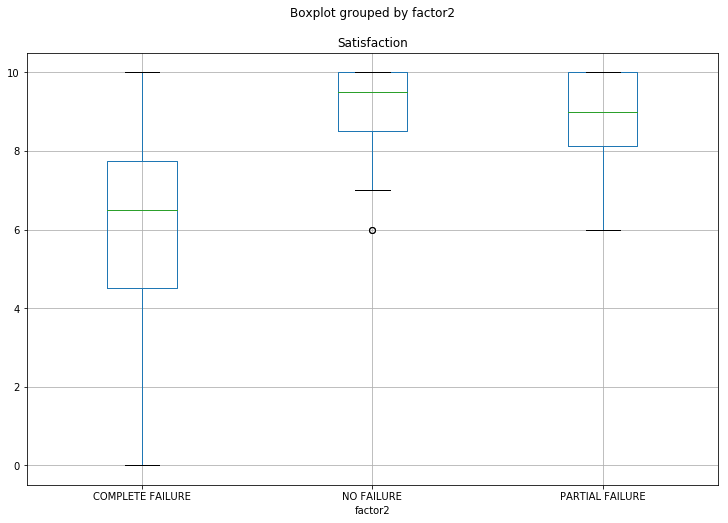

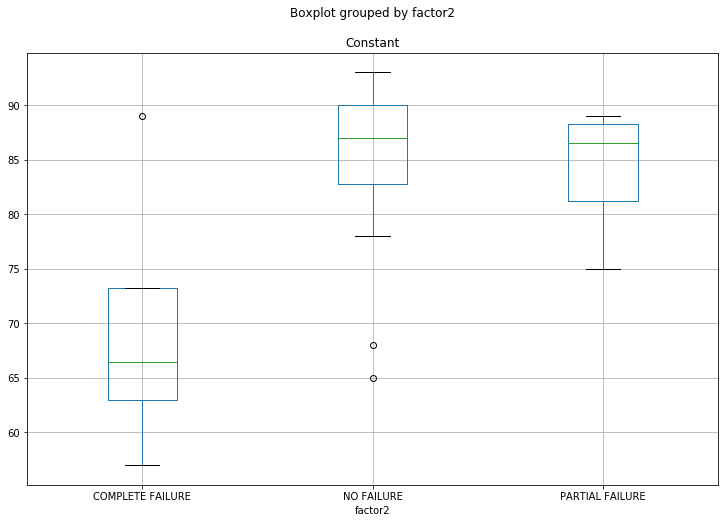

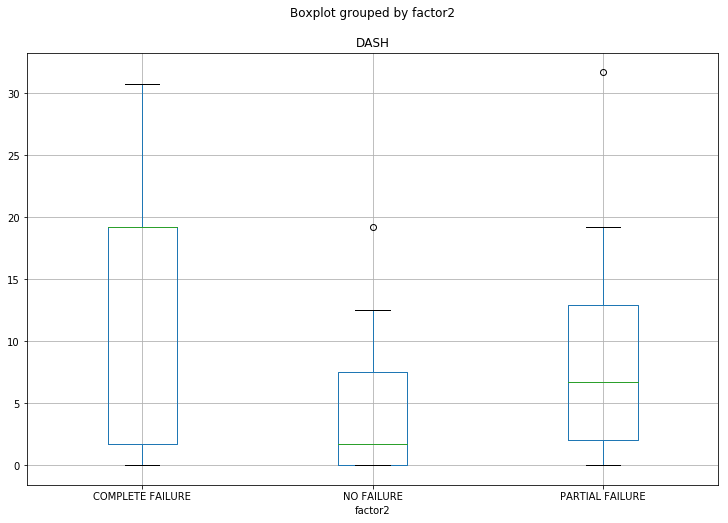

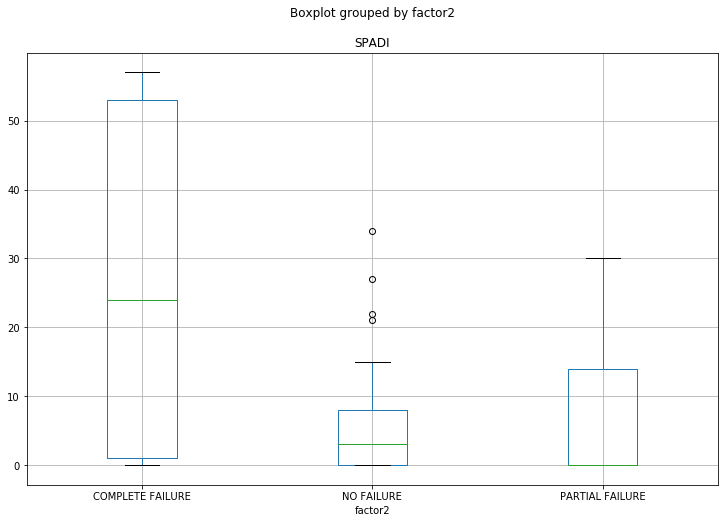

In [44]:
for factor in ['factor1','factor2']:
    for feature in FEATURES:
        print(factor,feature)
        print(df.boxplot(feature, by=factor, figsize=(12, 8)))

In [34]:
import numpy as np

In [43]:
import scipy.stats as ss
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for factor in ['factor1','factor2']:
    for feature in FEATURES:
        
        df_ = df[[feature,factor]].dropna()


        temp = [df_.loc[df[factor]==f,feature] for f in np.unique(df[factor])]

        print('*'*100)
        print(factor,feature)
        print('')
        print(ss.f_oneway(*temp))
        print('')
        print(pairwise_tukeyhsd(df_[feature],df_[factor]))

****************************************************************************************************
factor1 Satisfaction

F_onewayResult(statistic=10.056068346059922, pvalue=0.0028351819595272875)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1  group2 meandiff  lower   upper  reject
----------------------------------------------
ACUTE  CHRONIC -1.9235  -3.1476 -0.6994  True 
----------------------------------------------
****************************************************************************************************
factor1 Constant

F_onewayResult(statistic=3.2688177586642455, pvalue=0.07777303256372152)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1  group2 meandiff  lower   upper  reject
----------------------------------------------
ACUTE  CHRONIC -5.2118  -11.0292 0.6056 False 
----------------------------------------------
****************************************************************************************************
factor1 DASH

F_onewayResult(

F_onewayResult(statistic=10.056068346059922, pvalue=0.0028351819595272875)